# Analyzing results

We will use python and this jupyter notebook to plot and analyze the results obtained from the
fortran source code.

## Plotting results

For this we will use the `numpy` and `matplotlib.pyplot` packages

In [146]:
# Importing numpy and matplotlib
import numpy as np 
import matplotlib.pyplot as plt

In [147]:
# different styles are predefined that give different appearance to the plots. This one emulates the style of 
# the figures you'll find on statisical analysis news site fivethirtyeight.com
plt.style.use('fivethirtyeight')

In [148]:
# reading data stored in results.dat

file_name = 'results.dat'

# loadtxt reads all the data in a file and stores them in an array (assuming it's all floats)
# we use skiprows=1 to avoid the header
all_data = np.loadtxt(file_name,skiprows=1)

# We transpose the array in order to be able to extract each column individually
all_data = all_data.transpose()

# You should know what to do
number_of_protons = all_data[0]
number_of_neutrons = all_data[1]
experimental_values = all_data[2]
experimental_uncertainties = all_data[3]
theoretical_values = all_data[4]
theoretical_uncertainties = all_data[5]


### Comparing Experimental and Theoretical values

#### As a function of the number of protons

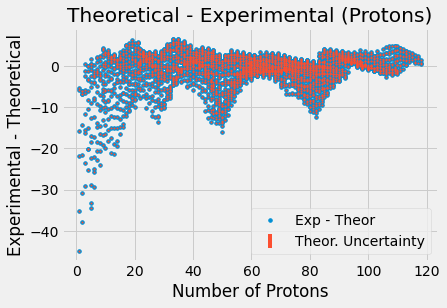

In [178]:
# The plot function can take two equally sized arrays,
# taking the first one as the x coordinates and the second one as the y coordinates

# In pyplot, using the argument '.' will draw points as a marker instead of lines.
# Other markers are available (circles 'o', triangles '^', diamonds 'd', starts '*', .... )
# See the notes section in the documentation for more details
# https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(number_of_protons, experimental_values-theoretical_values, '.', markersize=7)
plt.errorbar(number_of_protons, experimental_values-theoretical_values, yerr = theoretical_uncertainties, fmt ='.', markersize=2)
plt.xlabel('Number of Protons')
plt.ylabel('Experimental - Theoretical')
plt.title('Theoretical - Experimental (Protons)')
# Set appropriate labels with the correct units.
# plt.xlabel(...)
# plt.ylabel(...)
# legend displays the labels given in each plot
plt.gca().legend(('Exp - Theor','Theor. Uncertainty'));
plt.show()

#### As a function of the number of neutrons

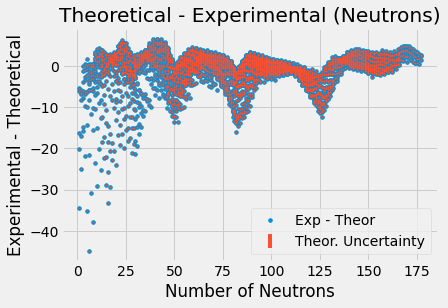

In [179]:
# You know what to do

plt.plot(number_of_neutrons, experimental_values-theoretical_values, '.', markersize = 7)
plt.errorbar(number_of_neutrons, experimental_values-theoretical_values, yerr = theoretical_uncertainties, fmt ='.', markersize=2)
plt.xlabel('Number of Neutrons')
plt.ylabel('Experimental - Theoretical')
plt.title('Theoretical - Experimental (Neutrons)')
plt.gca().legend(('Exp - Theor','Theor. Uncertainty'));
plt.show()

What type of structure do you see in the difference between experimental and theoretical values?

Describe it and explain the reasons behind it in the cell below

**It appears that there are peaks at points where the isotope may be unstable at those points. At 25, 50, 75, and 125 neutrons we see a dip indicating that the theoretical model might not be as accurate for those values. Outside of this we tend to see a small difference between the experimental and theoretical values. However, the model is for stable isotopes, and in cases where the isotopes our unstable it would not be an accurrate model.**

### Comparing theoretical and experimental uncertainties

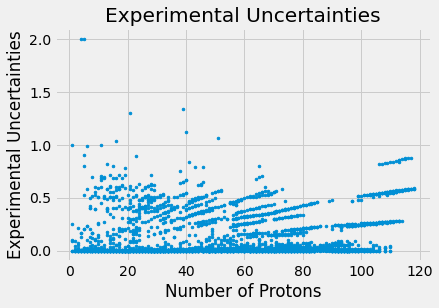

In [187]:
# Make a plot of the experimental errors in this cell
# Also use points instead of lines
plt.plot(number_of_protons, experimental_uncertainties, '.', markersize = 5)
plt.xlabel('Number of Protons')
plt.ylabel('Experimental Uncertainties')
plt.title('Experimental Uncertainties');
plt.show()

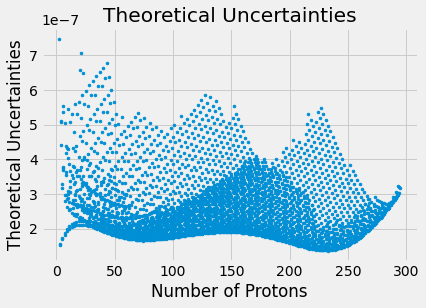

In [188]:
# Make a plot of the theoretical errors in this cell
# Also use points instead of lines
plt.plot(number_of_protons + number_of_neutrons, theoretical_uncertainties, '.', markersize = 5)
plt.xlabel('Number of Protons')
plt.ylabel('Theoretical Uncertainties')
plt.title('Theoretical Uncertainties');
plt.show()

Discuss in the cell below if the experimental and theoretical errors are similar or not (do they have the same order of magnitude). Also discuss why

**The experimental uncertainties are significantly larger than the theoretical uncertainties. This is primarily due to more external factors that can impact experimental values. These factors are not present for the computational process, so the theoretical error will be less. The pattern appears more random for the experimental due to these errors, whereas the theoretical uncertainties appear more uniform.**

## Advanced part of the project

### Reading the data from results file

In [189]:
# reading data stored in results_advanced.dat

# You should know how to do this by now
file_name = 'advanced_results.dat'
all_data_adv = np.loadtxt('advanced_results.dat', skiprows=1)
all_data_adv = all_data_adv.transpose()
number_of_protons = all_data_adv[0]
Valley_of_Stability = all_data_adv[1]
drip_line_positions = all_data_adv[2]



### Drawing the positions of the stable isotopes and neutron dripline

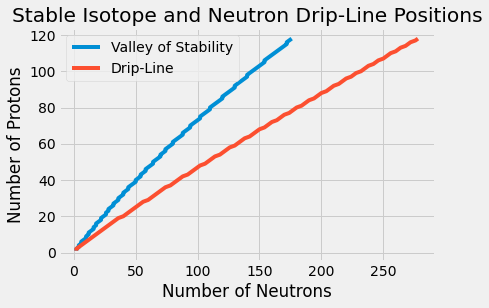

In [193]:
# Your plots here should be two lines. (not points like in the previous ones)
plt.plot(Valley_of_Stability, number_of_protons)
plt.plot(drip_line_positions, number_of_protons)
# The x-axis should indicate the number of neutrons
# The y-axis should indicate the number of protons
plt.xlabel('Number of Neutrons')
plt.ylabel('Number of Protons')
plt.title('Stable Isotope and Neutron Drip-Line Positions')
plt.gca().legend(('Valley of Stability','Drip-Line'));
plt.show()

## Defining a function to calculate the reduced $\chi^2$

In [98]:
# Python allows you to define functions!

def reduced_chi_square(experiment, sigma, theory, n_parameters):
    # The function takes numpy arrays containing the experimental and theoretical values
    chi_square = ((experiment - theory)/sigma)**2
    # chi_square is anohter numpy array that contains the results of the element-wise operations
    n_data = len(experiment)
    # The len() function gives you the length of an array
    
    # we can use the numpy function sum to add all the elements in chi_square
    chi_square = np.sum(chi_square)/(n_data - n_parameters)
    return chi_square

# Python uses indentation to indicate the start and
# end of block constructs (definitions, for loops, if statements, etc)

In [99]:
# Now we can use our new function to calculate the reduced chi square


# chi2 = reduced_chi_square(...)
chi2 = reduced_chi_square()

print('The reduced chi sqaure for the liquid drop model is :',chi2)

TypeError: reduced_chi_square() missing 4 required positional arguments: 'experiment', 'sigma', 'theory', and 'n_parameters'